# House Prices - Advanced Regression Techniques

In this project we have the job to predict each house selling price, based on the vast quantity of variables.

For this we will use the known framework from the other projects:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentationation

## 1. Problem definition

It is our job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

## 2. Data

The data we have to use came from Kaggle (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data):

Is composed from: 
* train.csv - the training set
* test.csv - the test set
* data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
* sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

**Note** The full data list description can be viewed on the link above.

## 3. Evaluation

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

The file should contain a header and have the following format:
`
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221`
etc.

## 4. Features

Here's a brief version of what we have in the data description file:

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.* 
MSSubClass: The building clas
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Utilities: Type of utilities available
* Neighborhood: Physical locations within Ames city limits
* Foundation: Type of foundation
* ...
  
Full list can be viewed on the Kaggle website ("https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data") with more details about each one in the `data_description.txt` file.on

In [1]:
# Importing the tools needed and starting regular EDA (exploratory data analysis)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Models from scikit learn
from sklearn.ensemble import RandomForestRegressor


# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Let's import our data
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Now we will start exploring the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: ylabel='Frequency'>

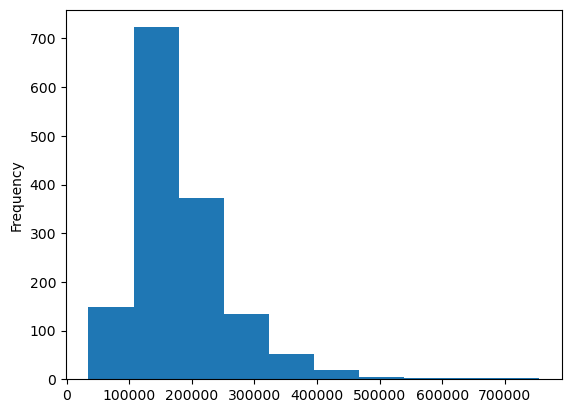

In [7]:
df["SalePrice"].plot(kind="hist")

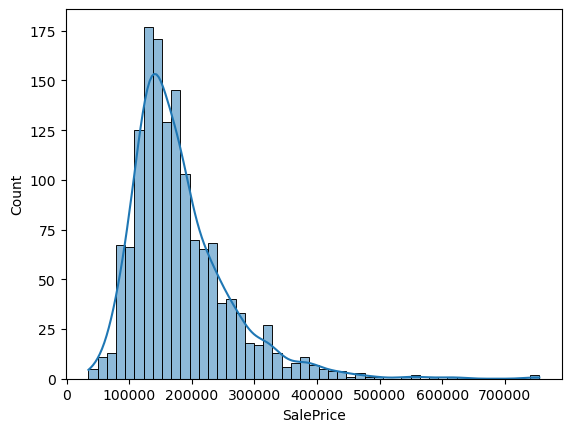

In [8]:
sns.histplot(df['SalePrice'], kde=True);

In [9]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


It looks like we have a positive (right) skew and a Leptokurtic kurtosis (which can indicate a high outlier frequency), we will need to keep these distribution caracteristics in mind for future operations.

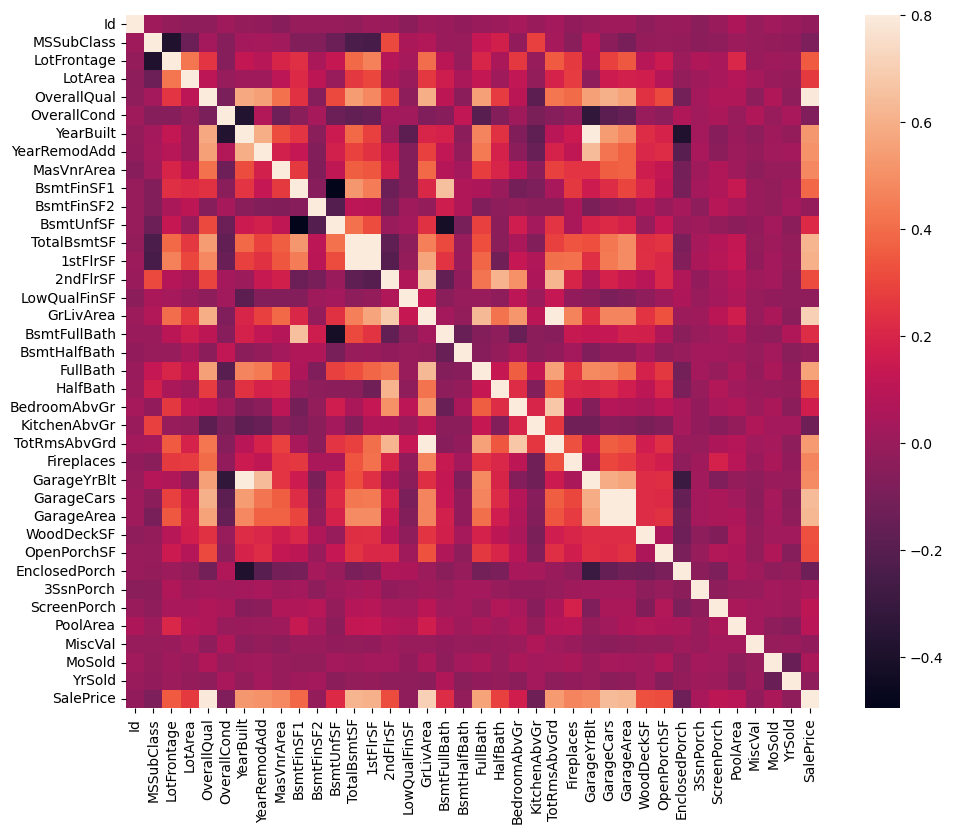

In [10]:
# We can create a correlation matrix so we can look at the most important features
corrmat = df.corr(numeric_only=True)
f, ax = plt.subplots (figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True);

We can see a few correlations here like OverallQual, GarageCarsor GrLivArea, but let's have a closer look at the most important ones thru another correlation matrix

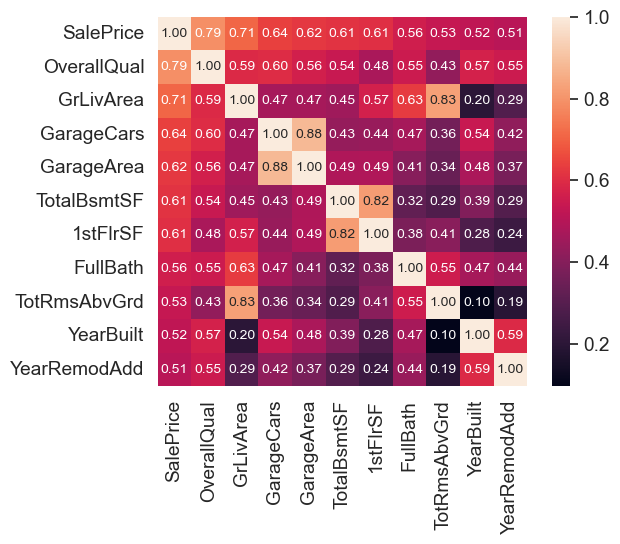

In [11]:
# Saleprice correlation matrix
k = 11
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

So these will be the categories we will focus on and the other ones we will not need.

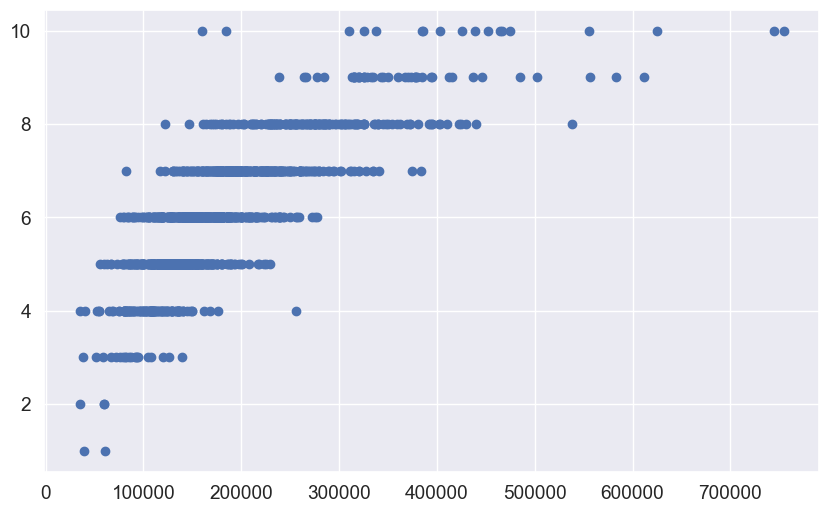

In [12]:
fig, ax = plt.subplots (figsize=(10,6))
ax.scatter(df["SalePrice"], df["OverallQual"])
plt.style.use('_classic_test_patch');

In [13]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

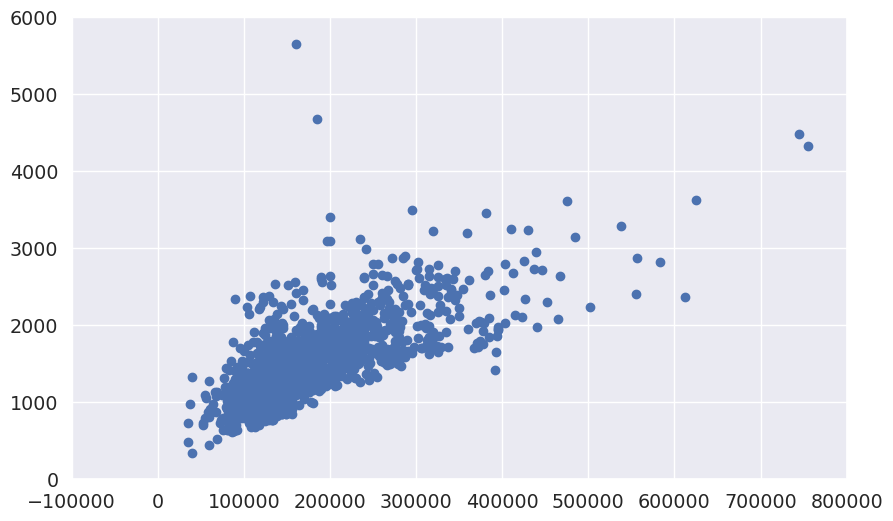

In [14]:
fig, ax = plt.subplots (figsize=(10,6))
ax.scatter(df["SalePrice"], df["GrLivArea"])
plt.style.use('classic')

In [15]:
# Since the two values with over 4000 Square feet are outliers because they do not reflect the true value, we will delete them
df.sort_values(by="GrLivArea", ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [16]:
df=df.drop(df[df["Id"]==524].index)

In [17]:
df=df.drop(df[df["Id"]==1299].index)

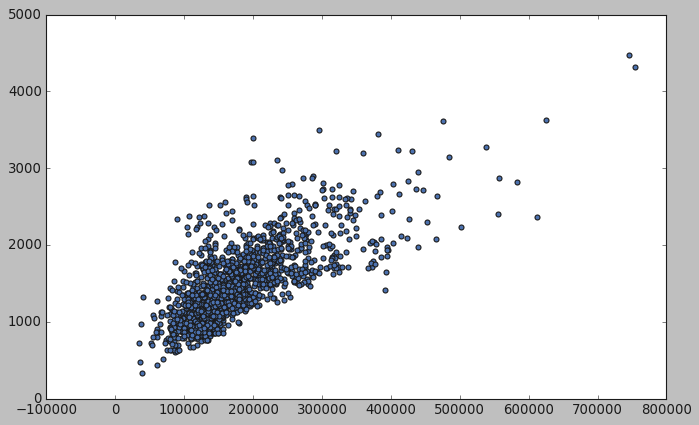

In [18]:
fig, ax = plt.subplots (figsize=(10,6))
ax.scatter(df["SalePrice"], df["GrLivArea"])
plt.style.use('_classic_test_patch');

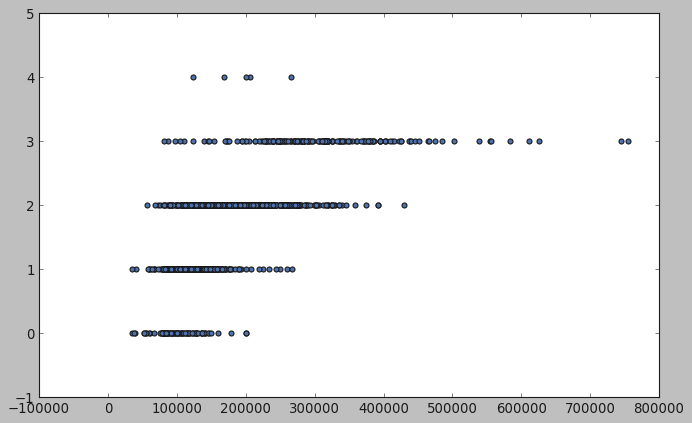

In [19]:
fig, ax = plt.subplots(figsize=( 10,6))
ax.scatter(df["SalePrice"],df["GarageCars"])
plt.style.use('_mpl-gallery');

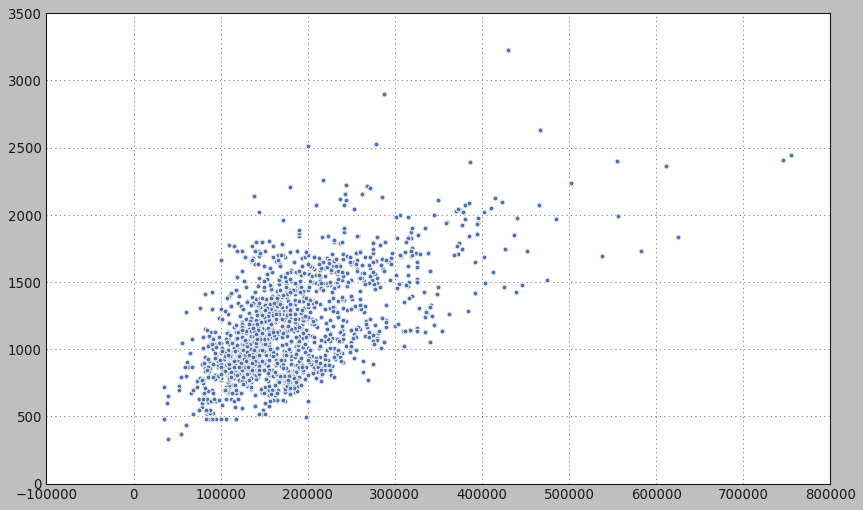

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter (df["SalePrice"], df["1stFlrSF"])
plt.style.use('bmh')

In [21]:
pd.set_option('display.max_columns', None)
df.sort_values(by="TotalBsmtSF", ascending=True)[:10]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
646,647,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1950,1950,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,SBrkr,1048,0,0,1048,0,0,1,0,3,1,TA,7,Min1,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,27,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,98300
1035,1036,20,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,3,1957,1957,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,Gd,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,N,SBrkr,845,0,0,845,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1957.0,Unf,1,290,TA,TA,N,186,0,0,0,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal,84000
392,393,20,RL,NaN,8339,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1959,1959,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,882,0,0,882,0,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1959.0,RFn,1,294,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,Shed,1200,7,2007,WD,Normal,106500
749,750,50,RL,50.0,8405,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,4,3,1945,1950,Gable,CompShg,WdShing,Wd Shng,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,TA,N,FuseF,1088,441,0,1529,0,0,2,0,4,1,TA,9,Mod,0,NaN,Detchd,1945.0,Unf,1,240,TA,TA,N,92,0,185,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,98000
1011,1012,90,RL,75.0,9825,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,5,5,1965,1965,Hip,CompShg,AsphShn,AsphShn,NaN,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,SBrkr,1664,0,0,1664,0,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,100000
868,869,60,RL,NaN,14762,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Feedr,Norm,1Fam,2Story,5,6,1948,1950,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,SBrkr,1547,720,53,2320,0,0,2,0,2,1,TA,7,Typ,1,TA,Attchd,1979.0,Unf,2,672,TA,TA,P,120,144,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,169000
1000,1001,20,RL,74.0,10206,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,3,1952,1952,Flat,Tar&Grv,BrkComm,Brk Cmn,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasW,Fa,N,FuseF,944,0,0,944,0,0,1,0,2,1,Fa,4,Min1,0,NaN,Detchd,1956.0,Unf,2,528,TA,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,82000
371,372,50,RL,80.0,17120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1.5Fin,4,4,1959,1959,Gable,CompShg,WdShing,Plywood,NaN,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1120,468,0,1588,0,0,2,0,4,1,TA,7,Min2,1,Gd,Detchd,1991.0,Fin,2,680,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,134432
778,779,90,RH,60.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,1Story,5,5,1977,1977,Gable,CompShg,Plywood,Plywood,BrkFace,320.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,2020,0,0,2020,0,0,2,0,4,2,TA,10,Typ,2,TA,Detchd,1977.0,Unf,2,630,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal,144000
342,343,90,RL,NaN,8544,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detch

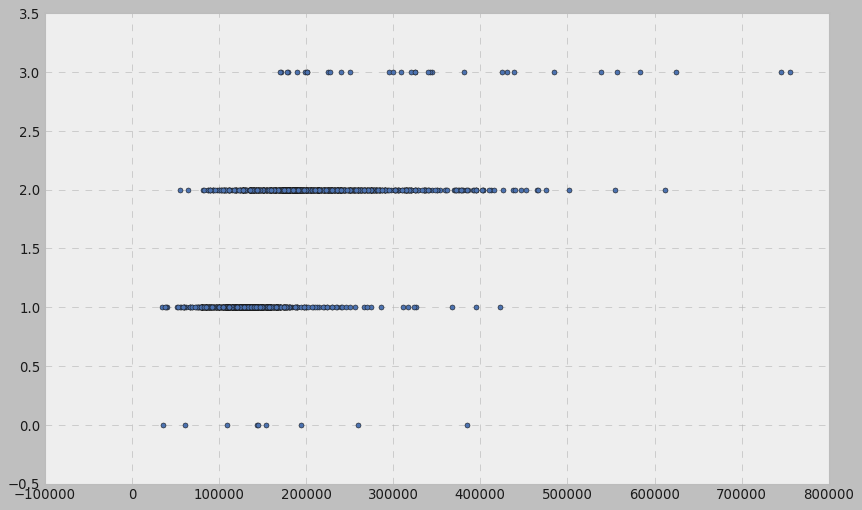

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["SalePrice"], df["FullBath"])
plt.style.use('classic');

In [23]:
df.sort_values(by="FullBath", ascending=True)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
188,189,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,Stone,275.0,TA,TA,CBlock,Gd,TA,Av,GLQ,1086,Unf,0,0,1086,GasA,TA,Y,SBrkr,1224,0,0,1224,2,0,0,2,2,2,TA,6,Typ,2,TA,Detchd,1979.0,Unf,2,528,TA,TA,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,153337
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,72.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1258,1258,GasA,Ex,Y,SBrkr,1402,0,0,1402,0,2,0,2,2,1,Gd,7,Typ,1,Gd,Attchd,2006.0,Fin,3,648,TA,TA,Y,120,16,0,0,0,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
634,635,90,RL,64.0,6979,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,Duplex,SFoyer,6,5,1980,1980,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,No,GLQ,1056,Unf,0,0,1056,GasA,Gd,Y,SBrkr,1056,0,0,1056,2,0,0,0,0,2,TA,4,Typ,0,NaN,Detchd,1980.0,Unf,2,576,TA,TA,Y,264,56,0,0,0,0,NaN,GdPrv,Shed,600,6,2010,WD,Normal,144000
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,NaN,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981.0,Fin,3,894,TA,TA,Y,857,72,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
375,376,30,RL,NaN,10020,Pave,NaN,IR1,Low,AllPub,Inside,Sev,Edwards,Norm,Norm,1Fam,1Story,1,1,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,Fa,Fa,BrkTil,Fa,Po,Gd,BLQ,350,Unf,0,333,683,GasA,Gd,N,FuseA,904,0,0,904,1,0,0,1,1,1,Fa,4,Maj1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal,61000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,NaN,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
118,119,60,RL,90.0,12376,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1990,1990,Hip,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,PConc,Gd,TA,Mn,GLQ,1470,Unf,0,203,1673,GasA,Gd,Y,SBrkr,1699,1523,0,3222,1,0,3,0,5,1,Gd,11,Typ,2,TA,Attchd,1990.0,Unf,3,594,TA,TA,Y,367,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,320000
1046,1047,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,208.0,Gd,TA,PConc,Ex,TA,Av,GLQ,240,Unf,0,1752,1992,GasA,Ex,Y,SBrkr,1992,876,0,2868,0,0,3,1,4,1,Ex,11,Typ,1,Gd,BuiltIn,2005.0,Fin,3,716,TA,TA,Y,214,108,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,G

Is seems prety strange that a few houses do not have a full bathroom (shower, toilet, sink) above grade. For now we let these houses in, but later we can come back to eliminate these as outliers if our model does not perform as we would like to. 

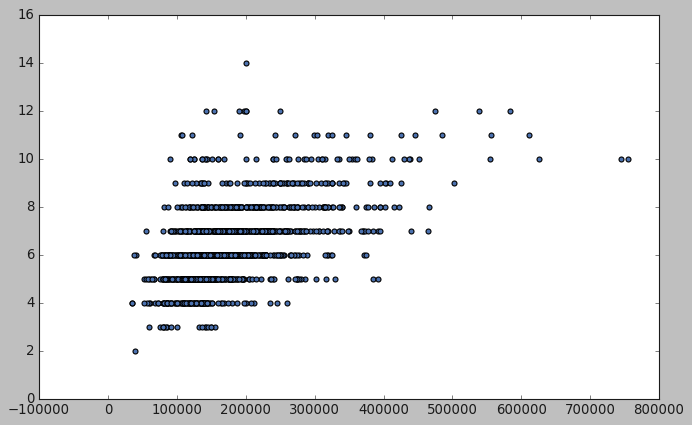

In [24]:
fig, ax = plt.subplots (figsize=(10,6))
ax.scatter(df["SalePrice"], df["TotRmsAbvGrd"])
plt.style.use('grayscale');

In [25]:
df.sort_values(by="TotRmsAbvGrd", ascending=False)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,7,1914,1995,Hip,CompShg,VinylSd,VinylSd,NaN,0.0,Fa,TA,CBlock,TA,Fa,No,LwQ,256,Unf,0,1184,1440,GasA,Ex,Y,FuseA,1440,1440,515,3395,0,0,2,0,8,2,Fa,14,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,110,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,2Story,7,5,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,184.0,TA,TA,CBlock,Gd,TA,No,BLQ,790,LwQ,469,133,1392,GasA,TA,Y,SBrkr,1392,1392,0,2784,1,0,3,1,5,1,Gd,12,Typ,2,TA,Attchd,1978.0,RFn,2,564,TA,TA,Y,0,112,0,0,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,NaN,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3,840,Ex,TA,Y,0,260,0,0,410,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416,Unf,0,234,1650,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1,0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3,841,TA,TA,Y,503,36,0,0,210,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
1230,1231,90,RL,NaN,18890,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,NaN,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498,Rec,211,652,1361,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0,0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2,600,TA,TA,N,155,24,145,0,0,0,NaN,NaN,Gar2,8300,8,2007,WD,Normal,190000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1Story,2,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,Fa,No,Rec,290,Unf,0,0,290,GasA,TA,N,FuseF,438,0,0,438,0,0,1,0,1,1,Fa,3,Typ,0,NaN,Detchd,1930.0,Unf,1,246,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal,60000
614,615,180,RM,21.0,1491,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,SFoyer,4,6,1972,1972,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,LwQ,150,GLQ,480,0,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,TA,3,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,96,24,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,75500
850,851,120,RM,36.0,4435,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,170.0,Gd,TA,PConc,Gd,TA,Av,GLQ,659,Unf,0,189,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,0,NaN,Attchd,2003.0,Fin,2,420,TA,TA,Y,140,0,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,131500
1332,1333,20,RL,67.0,8877,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Edwards,Norm,Norm,1Fam,1Story,4,6,1938,1958,Gable,CompShg,MetalSd,MetalSd,NaN,0.0

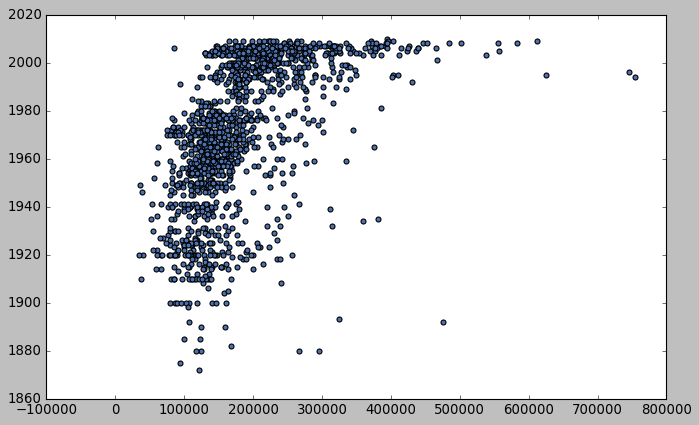

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["SalePrice"], df["YearBuilt"]);

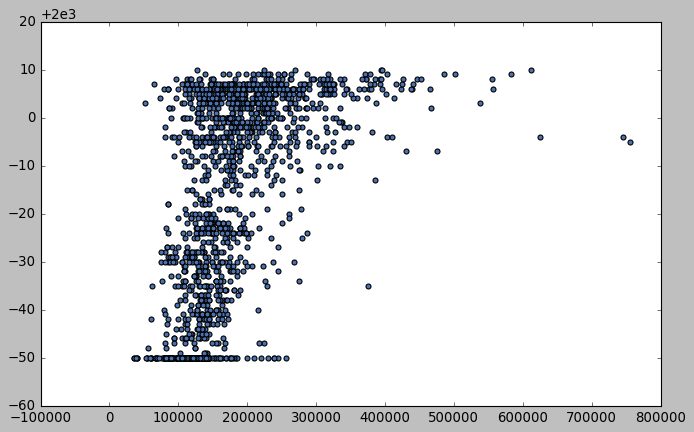

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
ax. scatter (df["SalePrice"], df["YearRemodAdd"]);

Now we have an idea about the values and how all of these variables are connected to the saleprice, now let's see how mane missing values do we have in the features we are most interested in.

In [28]:
df["OverallQual"].isna().sum()

0

In [29]:
total = df.isnull().sum().sort_values(ascending=False)
total[:20]

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

Since none of these features are very important for our sale price (after looking at the correlation matrix) we do not keep them since the ones at the top have a very high number of missing values and the other ones have a high correlation between them ( see the Garage ones or Basement).

Since we have only one missing value from Electrical feature, we will delete it from our data.

In [30]:
df.sort_values(by="Electrical", ascending=False)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
948,949,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal,192500
957,958,20,RL,70.0,7420,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1962,1962,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,417,Unf,0,640,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1977.0,Fin,2,576,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal,132000
956,957,160,RM,24.0,1300,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blueste,Norm,Norm,TwnhsE,2Story,6,6,1980,1980,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,285,Unf,0,276,561,GasA,TA,Y,SBrkr,561,668,0,1229,0,0,1,1,2,1,TA,5,Typ,1,TA,Attchd,1980.0,Fin,2,462,TA,TA,Y,150,0,0,0,0,0,NaN,GdPrv,NaN,0,5,2009,WD,Normal,124000
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,1975,1975,Flat,Tar&Grv,WdShing,Plywood,BrkFace,250.0,TA,TA,CBlock,Gd,Gd,Gd,GLQ,945,Unf,0,0,945,GasA,TA,Y,SBrkr,980,0,0,980,0,2,2,0,4,0,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,1276,90,RL,95.0,11345,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Feedr,Norm,Duplex,2Story,5,5,1948,1950,Gable,Roll,AsbShng,AsbShng,Stone,567.0,TA,TA,CBlock,TA,TA,No,Rec,220,Unf,0,708,928,GasA,Gd,Y,FuseA,928,992,0,1920,0,0,2,0,4,2,TA,10,Typ,0,NaN,Detchd,1948.0,Unf,2,400,TA,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,137000
491,492,50,RL,79.0,9490,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,6,7,1941,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,BLQ,403,Rec,165,238,806,GasA,TA,Y,FuseA,958,620,0,1578,1,0,1,0,3,1,Fa,5,Typ,2,TA,Attchd,1941.0,Unf,1,240,TA,TA,Y,0,0,32,0,0,0,NaN,MnPrv,NaN,0,8,2006,WD,Normal,133000
1001,1002,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,Fa,TA,No,Unf,0,Unf,0,691,691,GasA,Ex,Y,FuseA,691,0,0,691,0,0,1,0,2,1,Ex,4,Typ,0,NaN,Detchd,1920.0,Unf,1,216,Fa,TA,N,0,20,94,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Abnorml,86000
729,730,30,RM,52.0,6240,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,5,1925,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,BLQ,152,Unf,0,628,780,GasA,TA,Y,F

In [31]:
df=df.drop(df[df["Id"]==1380].index)

Thinking in perspective when we will predict on the test data set we will need to have the same features as the train data set, so in other words the two sets should have matching features. For this we will not create a command to delete all of the NaN because in the test dada set it is possible to have other ones, we will delete the specific columns after their name.

In [32]:
df = df.drop(["PoolQC","MiscFeature","Alley","Fence","MasVnrType","FireplaceQu","LotFrontage","GarageYrBlt","GarageCond","GarageType","GarageFinish","GarageQual","BsmtFinType2","BsmtExposure","BsmtQual","BsmtCond","BsmtFinType1","MasVnrArea"], axis=1)

In [33]:
total = df.isnull().sum().sort_values(ascending=False)
total[:20]

Id              0
Fireplaces      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
GarageCars      0
CentralAir      0
GarageArea      0
PavedDrive      0
WoodDeckSF      0
dtype: int64

In [34]:
# Let's find all the columns which contain strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
PavedDrive
SaleType
SaleCondition


In [35]:
# Now we need to change the strings into categories
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered() 

In [36]:
# Check if all the numeric are in place, so no missing values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [37]:
#... and from category to numbers.

for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes+1  

In [90]:
# It is time to train our first model using RandomForestClassifier
from sklearn.metrics import root_mean_squared_error

X = df.drop("SalePrice", axis=1)
y=df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor (random_state=42)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8945183139703906

In [91]:
y_temp_preds = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_temp_preds)
rmse

25518.40652332094

In [92]:
# Now let's try other models as well
from sklearn.linear_model import Ridge

model2 = Ridge()
model2.fit(X_train, y_train)

model2.score(X_test, y_test)

0.8609274063646916

It seems that the RandomForestRegressor brings better results, so we will look at it when we will start the hyperparameter tuning

In [104]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [None, 3, 5, 10, 80],
    'max_features': [1, 3, "sqrt", "auto"],
    'min_samples_leaf': np.arange(1, 20, 2),
    'min_samples_split': np.arange(2, 20, 2),
    'n_estimators': [100, 200, 300]
}

# Instantiate the grid search model
grid_search = GridSearchCV(RandomForestRegressor(n_jobs=-1,
                                                 random_state=42),
                           param_grid = param_grid, 
                           cv = 3, verbose = True)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 5400 candidates, totalling 16200 fits


KeyboardInterrupt: 

In [94]:
grid_search.score(X_test, y_test)

0.824811348023461

In [95]:
y_temp_preds2 = grid_search.predict(X_test)

rmse2 = root_mean_squared_error(y_test, y_temp_preds2)
rmse2

32886.52652096175

In [96]:
# Now we must import the test data and apply the same preprocessing methods
test=pd.read_csv("test.csv")

In [97]:
test = test.drop(["PoolQC","MiscFeature","Alley","Fence","MasVnrType","FireplaceQu","LotFrontage","GarageYrBlt","GarageCond","GarageType","GarageFinish","GarageQual","BsmtFinType2","BsmtExposure","BsmtQual","BsmtCond","BsmtFinType1","MasVnrArea"], axis=1)

In [98]:
# Since here we have some missing values and we can't simply delete the rows, we will fill them with values

test["MSZoning"].fillna("RL", inplace=True)
test["BsmtFinSF1"].fillna(test["BsmtFinSF1"].mean, inplace=True)
test["Utilities"].fillna("AllPub", inplace=True)
test["GarageArea"].fillna(test["GarageArea"].mean, inplace=True)
test["Exterior1st"].fillna("VinylSd", inplace=True)
test["GarageCars"].fillna("0", inplace=True)
test["Exterior2nd"].fillna("VinylSd", inplace=True)
test["BsmtFinSF2"].fillna(test["BsmtFinSF2"].mean, inplace=True)
test["KitchenQual"].fillna("TA", inplace=True)
test["BsmtUnfSF"].fillna(test["BsmtUnfSF"].mean, inplace=True)
test["Functional"].fillna("Typ", inplace=True)
test["BsmtHalfBath"].fillna("0", inplace=True)
test["SaleType"].fillna("WD", inplace=True)
test["BsmtFullBath"].fillna("0", inplace=True)
test["TotalBsmtSF"].fillna(test["TotalBsmtSF"].mean, inplace=True)

In [99]:
for label, content in test.items():
    if pd.api.types.is_string_dtype(content):
        test[label] = content.astype("category").cat.as_ordered()

In [100]:
for label, content in test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [101]:
for label, content in test.items():
    if not pd.api.types.is_numeric_dtype(content):
        test[label] = pd.Categorical(content).codes+1

In [102]:
y_test_test = grid_search.predict(test)
y_test_test

array([119040.25004559, 139368.58845126, 195042.66786944, ...,
       156602.01332228, 134133.2217048 , 211727.05322481])

In [103]:
output = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_test_test})
output.to_csv('prediction.csv', index=False)